In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

control,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-013022":
    fig_casename='ms_gzCOBALT'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-013022 ms_gzCOBALT


In [4]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022


In [5]:
pp_path=os.path.join(path_root, case, machine_target, 'pp', 'ocean_cobalt_omip_daily', 'ts', 'daily', '5yr')
dates=['19880101-19921231','19930101-19971231','19980101-20021231','20030101-20071231']
files = [(pp_path + '/ocean_cobalt_omip_daily.' + d + '.' + v + '.nc') for d in dates for v in ['nlgt_100','nsmt_100']]
files

['/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_omip_daily/ts/daily/5yr/ocean_cobalt_omip_daily.19880101-19921231.nlgt_100.nc',
 '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_omip_daily/ts/daily/5yr/ocean_cobalt_omip_daily.19880101-19921231.nsmt_100.nc',
 '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_omip_daily/ts/daily/5yr/ocean_cobalt_omip_daily.19930101-19971231.nlgt_100.nc',
 '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_omip_daily/ts/daily/5yr/ocean_cobalt_omip_daily.19930101-19971231.nsmt_100.nc',
 '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_omip_daily/ts/daily/5yr/ocean_cobalt_omip_daily.19980101-20021231.nlgt_100.nc',


In [6]:
files2=glob(tmpdir+'/ocean_cobalt_omip_sfc.1988-2007*.nc')
files2

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.06.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.03.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.04.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.08.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.05.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.07.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.01.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.09.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_omip_sfc.1988-2007.02.nc']

In [7]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
ds2=xr.open_mfdataset(files2, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [8]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 7300, xh: 720, yh: 576)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 1988-01-01 12:00:00 ... 2007-12-31 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(1825,), meta=np.ndarray>
    nlgt_100    (time, yh, xh) float32 dask.array<chunksize=(1825, 576, 720), meta=np.ndarray>
    time_bnds   (time, nv) timedelta64[ns] dask.array<chunksize=(1825, 2), meta=np.ndarray>
    nsmt_100    (time, yh, xh) float32 dask.array<chunksize=(1825, 576, 720), meta=np.ndarray>
Attributes:
    filename:            ocean_cobalt_omip_daily.19880101-19921231.nlgt_100.nc
    title:               OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:    areacello: 19880101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [9]:
ds2 = ds2.drop([v for v in ds2 if v not in ['xh','yh','time','chlos']])
ds2 = ds2.rename({'xh': 'lon', 'yh': 'lat'})
ds2

<xarray.Dataset>
Dimensions:  (lat: 576, lon: 720, nv: 2, time: 9)
Coordinates:
  * lon      (lon) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * lat      (lat) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 1999-07-18 00:00:00 ... 2000-03-17 12:00:00
  * nv       (nv) float64 1.0 2.0
Data variables:
    chlos    (time, lat, lon) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes:
    filename:          ocean_cobalt_omip_sfc.1988-1992.06.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Mon Feb  7 11:14:56 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [10]:
def abline(slope, intercept, **kwargs):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

## Figure - Seasonal Cycle compared with Control

In [11]:
import pandas as pd
dt2=pd.read_csv('dt2cast_ZerosAsMinValue.csv')
dt2

,lon,lat,chl_gs_mean,Appendicularians,Thaliaceans,Copepods,Tunicates
0,-179.5,-59.5,0.390548,NaN,NaN,NaN,NaN
1,-179.5,-58.5,0.327493,NaN,NaN,NaN,NaN
2,-179.5,-57.5,0.284213,NaN,NaN,NaN,NaN
3,-179.5,-56.5,0.280899,NaN,NaN,NaN,NaN
4,-179.5,-55.5,0.263312,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
32780,179.5,58.5,1.285610,NaN,NaN,10.051831,NaN
32781,179.5,59.5,1.756678,NaN,NaN,5.944884,NaN
32782,179.5,60.5,1.761255,NaN,NaN,1.014612,NaN
32783,179.5,61.5,2.025337,NaN,NaN,3.915913,NaN


In [12]:
from scipy import stats
y=np.log10(dt2.Appendicularians)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
app_lm=stats.linregress(x[mask],y[mask])
print(app_lm)

y=np.log10(dt2.Thaliaceans)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
thal_lm=stats.linregress(x[mask],y[mask])
print(thal_lm)

y=np.log10(dt2.Copepods)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
cope_lm=stats.linregress(x[mask],y[mask])
print(cope_lm)

y=np.log10(dt2.Tunicates)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
tun_lm=stats.linregress(x[mask],y[mask])
print(tun_lm)

LinregressResult(slope=0.6266152195178633, intercept=-1.6974030918795977, rvalue=0.22752515706944576, pvalue=3.926243999688225e-43, stderr=0.04490320441530981, intercept_stderr=0.034734146568002326)
LinregressResult(slope=0.21635635511148538, intercept=-0.5858929175810268, rvalue=0.09236711982299184, pvalue=1.9822115388836256e-09, stderr=0.0359844885002872, intercept_stderr=0.027356390232681722)
LinregressResult(slope=0.5724557321918834, intercept=0.7227737636958664, rvalue=0.5295370789085818, pvalue=0.0, stderr=0.00944849824728197, intercept_stderr=0.0070557836405861244)
LinregressResult(slope=0.23480086380935075, intercept=-0.6467442815327124, rvalue=0.09902521955910874, pvalue=4.723001462614828e-12, stderr=0.03387648840044104, intercept_stderr=0.025169102310368573)


### Correct observational points for net biases

In [13]:
APP_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
ya=np.log10(dt2.Appendicularians * APP_CORR)
xa=np.log10(dt2.chl_gs_mean)
maska = np.isfinite(xa) & np.isfinite(ya)
app_lm_corr=stats.linregress(xa[maska],ya[maska])

THAL_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
yt=np.log10(dt2.Thaliaceans * THAL_CORR)
xt=np.log10(dt2.chl_gs_mean)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corr=stats.linregress(xt[maskt],yt[maskt])
thal_lm_corr

#LOWER BOUND
APP_CORR_LOW = 5
ya=np.log10(dt2.Appendicularians * APP_CORR_LOW)
mask = np.isfinite(xa) & np.isfinite(ya)
app_lm_corrlow=stats.linregress(xa[maska],ya[maska])
APP_CORR_HIGH = 15
ya=np.log10(dt2.Appendicularians * APP_CORR_HIGH)
mask = np.isfinite(xa) & np.isfinite(ya)
app_lm_corrhigh=stats.linregress(xa[maska],ya[maska])

THAL_CORR_LOW = 5
yt=np.log10(dt2.Thaliaceans * THAL_CORR_LOW)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corrlow=stats.linregress(xt[maskt],yt[maskt])
THAL_CORR_HIGH = 15
yt=np.log10(dt2.Thaliaceans * THAL_CORR_HIGH)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corrhigh=stats.linregress(xt[maskt],yt[maskt])

## Regrid onto observational points

In [14]:
var_keep = ['nsmt_100', 'nlgt_100', 'xh', 'yh', 'time']
do = ds.drop([v for v in ds.variables if v not in var_keep])
do = do.squeeze(drop=True)
do = do.rename({'xh': 'lon', 'yh': 'lat'})

In [15]:
do=xr.decode_cf(do)

In [16]:
for var in ['nsmt_100','nlgt_100']:
    SH_subset = do[var].where(do.lat < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=181, axis=0)
    full_field = do[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset
    
    svar = var + '_gs'
    do[svar] = xr.DataArray(full_field, dims=do[var].dims, coords=do[var].coords)

do

<xarray.Dataset>
Dimensions:      (lat: 576, lon: 720, time: 7300)
Coordinates:
  * time         (time) object 1988-01-01 12:00:00 ... 2007-12-31 12:00:00
  * lon          (lon) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * lat          (lat) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables:
    nlgt_100     (time, lat, lon) float32 dask.array<chunksize=(1825, 576, 720), meta=np.ndarray>
    nsmt_100     (time, lat, lon) float32 dask.array<chunksize=(1825, 576, 720), meta=np.ndarray>
    nsmt_100_gs  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    nlgt_100_gs  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:            ocean_cobalt_omip_daily.19880101-19921231.nlgt_100.nc
    title:               OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:    areacello: 19880101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [17]:
do=do.where(do.time.dt.month > 2, drop=True) # restrict DFJ

#do=do.where(do.time.dt.month < 12, drop=True) # restrict DJF only
do=do.where(do.time.dt.month < 9, drop=True) # restrict DJF and SON

do

<xarray.Dataset>
Dimensions:      (lat: 576, lon: 720, time: 3680)
Coordinates:
  * time         (time) object 1988-03-01 12:00:00 ... 2007-08-31 12:00:00
  * lon          (lon) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * lat          (lat) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables:
    nlgt_100     (time, lat, lon) float32 dask.array<chunksize=(920, 576, 720), meta=np.ndarray>
    nsmt_100     (time, lat, lon) float32 dask.array<chunksize=(920, 576, 720), meta=np.ndarray>
    nsmt_100_gs  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    nlgt_100_gs  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:            ocean_cobalt_omip_daily.19880101-19921231.nlgt_100.nc
    title:               OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:    areacello: 19880101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [18]:
apps=dt2[['lon','lat','chl_gs_mean','Appendicularians']].dropna()
thals=dt2[['lon','lat','chl_gs_mean','Thaliaceans']].dropna()

In [19]:
apps_locs=xr.Dataset()
apps_locs['lon']=xr.DataArray(data=apps.lon.values, dims=('location'))
apps_locs['lat']=xr.DataArray(data=apps.lat.values, dims=('location'))

thals_locs=xr.Dataset()
thals_locs['lon']=xr.DataArray(data=thals.lon.values, dims=('location'))
thals_locs['lat']=xr.DataArray(data=thals.lat.values, dims=('location'))

In [20]:
# surface chlorophyll

SH_subset = ds2.chlos.where(ds2.lat < 0,drop=True).values
SH_subset = np.roll(SH_subset, shift=6, axis=0)
full_field = ds2['chlos'].values
full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

svar = 'surf_chl_gs'
ds2[svar] = xr.DataArray(full_field, dims=ds2['chlos'].dims, coords=ds2['chlos'].coords)

ds2=ds2.where(ds2.time.dt.month < 9, drop=True)
ds2=ds2.where(ds2.time.dt.month > 2, drop=True)
ds2

<xarray.Dataset>
Dimensions:      (lat: 576, lon: 720, nv: 2, time: 3)
Coordinates:
  * lon          (lon) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * lat          (lat) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time         (time) object 1999-07-18 00:00:00 ... 2000-03-17 12:00:00
  * nv           (nv) float64 1.0 2.0
Data variables:
    chlos        (time, lat, lon) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    surf_chl_gs  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          ocean_cobalt_omip_sfc.1988-1992.06.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Mon Feb  7 11:14:56 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [21]:
import xesmf as xe

regridder_apps = xe.Regridder(do, apps_locs, 'bilinear', locstream_out=True, reuse_weights=True)
regridder_thals = xe.Regridder(do, thals_locs, 'bilinear', locstream_out=True, reuse_weights=True)
regridder_apps_chl = xe.Regridder(ds2, apps_locs, 'bilinear', locstream_out=True, reuse_weights=True)
regridder_thals_chl = xe.Regridder(ds2, thals_locs, 'bilinear', locstream_out=True, reuse_weights=True)


Reuse existing file: bilinear_576x720_1x3569.nc
Reuse existing file: bilinear_576x720_1x4203.nc
Reuse existing file: bilinear_576x720_1x3569.nc
Reuse existing file: bilinear_576x720_1x4203.nc


In [22]:
ds_apps_rg = regridder_apps(do)
ds_thals_rg = regridder_thals(do)
ds_appchl_rg = regridder_apps_chl(ds2)
ds_thalchl_rg = regridder_thals_chl(ds2)

using dimensions ('lat', 'lon') from data variable nlgt_100 as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable nlgt_100 as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable chlos as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable chlos as the horizontal dimensions for this dataset.


## Select Random Times in the time series

In [23]:
n_apps = len(apps)
n_thals = len(thals)

In [24]:
times=do.time.values
timeid=np.arange(len(times))
print(times[0:5],timeid[0:5])

[cftime.DatetimeNoLeap(1988, 3, 1, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1988, 3, 2, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1988, 3, 3, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1988, 3, 4, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1988, 3, 5, 12, 0, 0, 0, has_year_zero=True)] [0 1 2 3 4]


In [25]:
np.random.seed(0)
app_id = np.random.choice(timeid, size=n_apps, replace=True)

np.random.seed(0)
thal_id = np.random.choice(timeid, size=n_thals, replace=True)

In [26]:
tmpapp=ds_apps_rg.nsmt_100_gs.values
app_sel=np.zeros(n_apps)

for i in np.arange(len(apps)):
    app_sel[i]=tmpapp[app_id[i],i]

In [27]:
tmpthal=ds_thals_rg.nlgt_100_gs.values
thal_sel=np.zeros(n_thals)

for i in np.arange(len(thals)):
    thal_sel[i]=tmpthal[thal_id[i],i]

In [28]:
y=np.log10(app_sel * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100) # mg C m-3
x=np.log10(ds_appchl_rg.surf_chl_gs.mean(dim='time') * 1e6) # mg m-3
mask = np.isfinite(x) & np.isfinite(y)
model_app_lm=stats.linregress(x[mask],y[mask])
print(model_app_lm)

y=np.log10(thal_sel * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100) # mg C m-2
x=np.log10(ds_thalchl_rg.surf_chl_gs.mean(dim='time') * 1e6) # mg m-3
mask = np.isfinite(x) & np.isfinite(y)
model_thal_lm=stats.linregress(x[mask],y[mask])
print(model_thal_lm)

LinregressResult(slope=0.6179564600800644, intercept=-0.5281716984125694, rvalue=0.577001574368806, pvalue=1.0042511118778181e-303, stderr=0.01493983877782523, intercept_stderr=0.011600864546407791)
LinregressResult(slope=0.36816231732458027, intercept=0.5228233715076063, rvalue=0.45135107926091306, pvalue=9.431905392397366e-205, stderr=0.01137725473644739, intercept_stderr=0.008452599084689691)


In [29]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Line2D([0], [0], marker='o', color='C0', markerfacecolor='C0', markersize=4, ls='None'),
                Line2D([0], [0], marker='o', color='k', markerfacecolor='k', markersize=4, ls='None'),
               (Patch(facecolor='#dddddd', edgecolor='grey'), Line2D([0], [0], color='#666666', lw=2, ls='--')),
                Line2D([0], [0], color='k', lw=2, ls='--')]
custom_lines2 = [Line2D([0], [0], marker='o', color='C0', markerfacecolor='C0', markersize=4, ls='None'),
                Line2D([0], [0], marker='o', color='k', markerfacecolor='k', markersize=4, ls='None'),
                Line2D([0], [0], color='#666666', lw=2, ls='--'),
                Line2D([0], [0], color='k', lw=2, ls='--')]
custom_labels=['Adj. Obs. Points','Model Points','Adj. Obs. Trend','Model Trend']

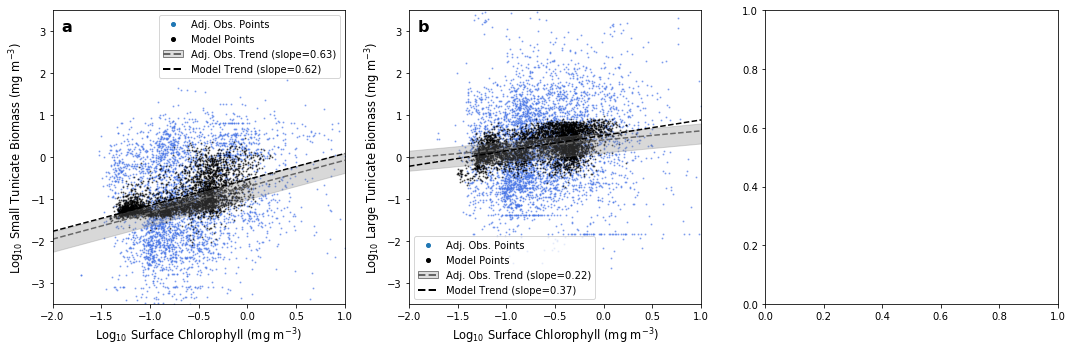

In [30]:
#fig=plt.figure(figsize=(12,5))
#gs=gridspec.GridSpec(1,2)

fig=plt.figure(figsize=(15,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
y=app_sel * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds_appchl_rg.surf_chl_gs.mean(dim='time') * 1e6 # mg m-3
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd*APP_CORR), alpha=0.5,s=1, c='#4573e6')
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
plt.fill_between(x_vals, app_lm_corrlow.intercept + app_lm_corrlow.slope * x_vals, 
                 app_lm_corrhigh.intercept + app_lm_corrhigh.slope * x_vals,
                 alpha=0.30, color='grey', interpolate=True)
abline(slope=app_lm_corr.slope, intercept=app_lm_corr.intercept, c='#666666')
abline(slope=model_app_lm.slope, intercept=model_app_lm.intercept, c='black')
plt.gca().text(0.03, 0.97, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

plt.legend(custom_lines, ['Adj. Obs. Points','Model Points',
                          'Adj. Obs. Trend (slope='+str(np.round(app_lm_corr.slope,2))+')',
                          'Model Trend (slope='+str(np.round(model_app_lm.slope,2))+')'])
plt.xlabel('Log$_{10}$ Surface Chlorophyll (mg m$^{-3}$)', fontsize=11.5)
plt.ylabel('Log$_{10}$ Small Tunicate Biomass (mg m$^{-3}$)', fontsize=11.5)


fig.add_subplot(gs[0,1])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
y=thal_sel * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds_thalchl_rg.surf_chl_gs.mean(dim='time') * 1e6 # mg m-3
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd*THAL_CORR), alpha=0.5,s=1, c='#4573e6')
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
plt.fill_between(x_vals, thal_lm_corrlow.intercept + thal_lm_corrlow.slope * x_vals, 
                 thal_lm_corrhigh.intercept + thal_lm_corrhigh.slope * x_vals,
                 alpha=0.30, color='grey', interpolate=True)
abline(slope=thal_lm_corr.slope, intercept=thal_lm_corr.intercept,c='#666666')
abline(slope=model_thal_lm.slope, intercept=model_thal_lm.intercept,c='black')
plt.gca().text(0.03, 0.97, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

plt.legend(custom_lines, ['Adj. Obs. Points','Model Points',
                          'Adj. Obs. Trend (slope='+str(np.round(thal_lm_corr.slope,2))+')',
                          'Model Trend (slope='+str(np.round(model_thal_lm.slope,2))+')'])
plt.xlabel('Log$_{10}$ Surface Chlorophyll (mg m$^{-3}$)', fontsize=11.5)
plt.ylabel('Log$_{10}$ Large Tunicate Biomass (mg m$^{-3}$)', fontsize=11.5)


fig.add_subplot(gs[0,2])


plt.tight_layout()

plt.savefig('plots/'+fig_casename+'_1988-2007_Biomass-Chl_Relationship_DAILY.png', dpi=150, bbox_inches='tight')